Please note the user must have the "dontpatronizeme_pcl.tsv" file uploaded into the same directory where this code is being ran from.

# Pip installations and libraries

In [ ]:
pip install tensorflow-text

In [ ]:
#pip install tf-models-official

In [ ]:
pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.5 MB/s 


In [ ]:
pip install bert-for-tf2

In [ ]:
pip install tensorflow

In [ ]:
import bert
from bert import tokenization

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import re
#from official.nlp import 
#import bert
import tensorflow_hub as hub
import math
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
import random
import os
from urllib import request
import bert

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from tensorflow.keras import layers

In [ ]:
from textblob import TextBlob

In [ ]:
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
#from tensorflow.keras.losses import softmax_cross_entropy_with_logits
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import nltk


In [ ]:
from nltk import word_tokenize

In [ ]:
from bert import bert_tokenization
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.corpus import wordnet as wn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.metrics import roc_curve

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.svm import SVC

# Data

In [ ]:
nltk.download("popular")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

In [ ]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py


In [ ]:
from dont_patronize_me import DontPatronizeMe
dpm_data = DontPatronizeMe('.', 'dontpatronizeme_pcl.tsv')

In [ ]:
dpm_data.load_task1()
dpm_data.train_task1_df.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,@@23953477,in-need,in,The ones in need of constant medical care are ...,0,0,0
1,@@4703096,immigrant,jm,NBC and Spanish-language Univision both declin...,0,0,0
2,@@25567226,in-need,hk,A second T-Home project is being launched in t...,0,0,0
3,@@1824078,poor-families,tz,Camfed would like to see this trend reversed ....,4,1,4
4,@@1921089,refugee,tz,Kagunga village was reported to lack necessary...,0,0,0


In [ ]:
data=dpm_data.train_task1_df

In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

# CNN Model

In [ ]:
data.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,@@23953477,in-need,in,The ones in need of constant medical care are ...,0,0,0
1,@@4703096,immigrant,jm,NBC and Spanish-language Univision both declin...,0,0,0
2,@@25567226,in-need,hk,A second T-Home project is being launched in t...,0,0,0
3,@@1824078,poor-families,tz,Camfed would like to see this trend reversed ....,4,1,4
4,@@1921089,refugee,tz,Kagunga village was reported to lack necessary...,0,0,0


In [ ]:
df_CNN=data

In [ ]:
#df2=df2.drop("country",1)
df_CNN=df_CNN.drop("art_id",1)
df_CNN=df_CNN.drop("par_id",1)
df_CNN=df_CNN.drop("keyword",1)
df_CNN=df_CNN.drop("text",1)
df_CNN=df_CNN.drop("orig_label",1)
df_CNN = df_CNN.rename(columns={'country': 'paragraph'})

In [ ]:
data_cleaned=df_CNN

In [ ]:
df_CNN.head()

,paragraph,label
0,The ones in need of constant medical care are ...,0
1,NBC and Spanish-language Univision both declin...,0
2,A second T-Home project is being launched in t...,0
3,Camfed would like to see this trend reversed ....,1
4,Kagunga village was reported to lack necessary...,0


In [ ]:
def preprocess_text(sen):
    # eliminate html tags (if any)
    sentence = remove_tags(sen)

    # eliminate numbers & punctuation
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # eliminate single characters
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # eliminate multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

calculate total number of different words used

In [ ]:
data_vocab = df_CNN["paragraph"].map(word_tokenize).values
total_vocab = set(word.lower() for tweet in data_vocab for word in tweet)

In [ ]:
len(total_vocab)

32959

Remove any symbols

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
pars = []
sentences = list(df_CNN['paragraph'])
for sen in sentences:
    pars.append(preprocess_text(sen))

In [ ]:
y_CNN=df_CNN["label"]

# Creating a BERT Tokenizer


In [ ]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [ ]:
def tokenize_pars(texts):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts))

In [ ]:
tokenized_pars = [tokenize_pars(text) for text in pars]


### preparing data for training/testing

When training the input sentences must be equi-length. Need to make all of the sentences as long as the longest sentence and introduce padding to any shorter sentences

In [ ]:
pars_and_length = [[par, y_CNN[i], len(par)]
                 for i, par in enumerate(tokenized_pars)]

In [ ]:
y2=np.array(y_CNN)

In [ ]:
random.shuffle(pars_and_length)

In [ ]:
pars_and_length.sort(key=lambda x: x[2])

remove length attribute

In [ ]:
sorted_pars_labels = [(par_lab[0], par_lab[1]) for par_lab in pars_and_length]

Once the reviews are sorted we will convert thed dataset so that it can be used to train TensorFlow 2.0 models. Run the following code to convert the sorted dataset into a TensorFlow 2.0-compliant input dataset shape.


In [ ]:
processed_DS = tf.data.Dataset.from_generator(lambda: sorted_pars_labels, output_types=(tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 32
batched_DS = processed_DS.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [ ]:
next(iter(batched_DS))

(<tf.Tensor: shape=(32, 5), dtype=int32, numpy=
 array([[    0,     0,     0,     0,     0],
        [ 8711,     0,     0,     0,     0],
        [ 3110, 20625,     0,     0,     0],
        [ 7074,  8556,  8711,     0,     0],
        [ 9042, 13141,  2336,     0,     0],
        [ 1996, 10275, 11560,     0,     0],
        [ 2040,  2003, 13141,     0,     0],
        [ 3492,  2172, 20625,     0,     0],
        [ 3319, 13141,  2375,     0,     0],
        [ 3554,  2058,  2273,  2308,     0],
        [ 2885,  5391, 16836, 19549,     0],
        [ 2028,  2111,  2035,  7489,     0],
        [ 8738,  2005,  2308,  2058,     0],
        [ 2454,  2000,  1996,  9776,     0],
        [ 2009,  2074,  3849, 20625,     0],
        [16836, 19549,  2125,  4977,     0],
        [ 6951,  7126,  5700,  8711,     0],
        [ 3579,  2006,  1996, 11573,     0],
        [ 8131,  2008,  2028,  5683, 20625],
        [20148,  3727,  2695,  2386, 11573],
        [ 3082, 15811, 17552,  2945, 11573],
       

#### seperate training and testing data - bit of a mad way to do it lol

In [ ]:
TOTAL_BATCHES = math.ceil(len(sorted_pars_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
batched_DS.shuffle(TOTAL_BATCHES)
test_data = batched_DS.take(TEST_BATCHES)
train_data = batched_DS.skip(TEST_BATCHES)


### creating model 

In [ ]:
class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

### CNN F1

In [ ]:
VOCAB_LENGTH =len(total_vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2
DROPOUT_RATE = 0.2


In [ ]:
text_model_CNN = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [ ]:
if OUTPUT_CLASSES == 2:
    text_model_CNN.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=tfa.metrics.F1Score(num_classes=1))
                       #metrics=tf.keras.metrics.Recall())
                       #metrics=["accuracy"])
else:
    text_model_CNN.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy"])

In [ ]:
NB_EPOCHS_CNN =list(range(1,10))
CNN_f1_results=[]
eps_list_CNN=[]
for epoch in NB_EPOCHS_CNN:
    text_model_CNN.fit(train_data, epochs=epoch)
    eps_list_CNN.append(epoch)
    CNN_f1_results.append(text_model_CNN.evaluate(test_data)[1][0])

33/33 [==============================] - 1s 14ms/step - loss: 1.7438 - f1_score: 0.2045
Epoch 1/2
300/300 [==============================] - 40s 133ms/step - loss: 1.4997e-04 - f1_score: 0.5241
Epoch 2/2
33/33 [==============================] - 1s 14ms/step - loss: 1.7421 - f1_score: 0.2038
Epoch 1/3
300/300 [==============================] - 45s 148ms/step - loss: 1.3882e-04 - f1_score: 0.5232
Epoch 2/3
300/300 [==============================] - 41s 138ms/step - loss: 1.8094e-04 - f1_score: 0.5200
Epoch 3/3
33/33 [==============================] - 1s 15ms/step - loss: 1.7546 - f1_score: 0.2058
Epoch 1/4
300/300 [==============================] - 40s 133ms/step - loss: 1.4636e-04 - f1_score: 0.5283
Epoch 2/4
300/300 [==============================] - 48s 158ms/step - loss: 1.4318e-04 - f1_score: 0.5058
Epoch 3/4
300/300 [==============================] - 40s 134ms/step - loss: 1.5138e-04 - f1_score: 0.4561
Epoch 4/4
33/33 [==============================] - 1s 14ms/step - loss: 1.7970 -

In [ ]:
text_model_CNN.fit(train_data, epochs=9)

Epoch 1/9
300/300 [==============================] - 50s 160ms/step - loss: 1.7323e-04 - f1_score: 0.8393
Epoch 2/9
300/300 [==============================] - 66s 218ms/step - loss: 1.4309e-04 - f1_score: 0.8382
Epoch 3/9
300/300 [==============================] - 45s 149ms/step - loss: 1.4657e-04 - f1_score: 0.8495
Epoch 4/9
300/300 [==============================] - 44s 146ms/step - loss: 1.4691e-04 - f1_score: 0.8584
Epoch 5/9
300/300 [==============================] - 47s 155ms/step - loss: 1.4592e-04 - f1_score: 0.8468
Epoch 6/9
300/300 [==============================] - 58s 192ms/step - loss: 1.4650e-04 - f1_score: 0.8563
Epoch 7/9
300/300 [==============================] - 45s 150ms/step - loss: 1.4897e-04 - f1_score: 0.8821
Epoch 8/9
300/300 [==============================] - 43s 144ms/step - loss: 1.4439e-04 - f1_score: 0.8899
Epoch 9/9
300/300 [==============================] - 45s 151ms/step - loss: 1.5148e-04 - f1_score: 0.8903


In [ ]:
CNN_f1_final_result=text_model_CNN.evaluate(test_data)[1]

33/33 [==============================] - 1s 23ms/step - loss: 2.5007 - f1_score: 0.2418


now to try the trained model on the testing data

### Now get list to store results of each one

In [ ]:
Metrics_list=[]
Metrics_score=[]

F1_list=[]
F1_score=[]

In [ ]:
F1_list.append("CNN")
F1_score.append(CNN_f1_final_result)


### Now accuracy

In [ ]:
if OUTPUT_CLASSES == 2:
    text_model_CNN.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       #metrics=tf.keras.metrics.Recall())
                       metrics=["accuracy"])
else:
    text_model_CNN.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy","recall","RecallAtPrecision","binary_accuracy"])

In [ ]:
#text_model_CNN.fit(train_data, epochs=NB_EPOCHS)

In [ ]:
NB_EPOCHS_CNN =list(range(1,15))
CNN_acc_results=[]
CNN_loss_results=[]
#eps_list_CNN=[]
for epoch in NB_EPOCHS_CNN:
    text_model_CNN.fit(train_data, epochs=epoch)
    CNN_acc_results.append(text_model_CNN.evaluate(test_data)[1]) #[0])

33/33 [==============================] - 1s 16ms/step - loss: 1.8845 - accuracy: 0.8097
Epoch 1/2
300/300 [==============================] - 40s 134ms/step - loss: 1.5310e-04 - accuracy: 0.9999
Epoch 2/2
33/33 [==============================] - 1s 15ms/step - loss: 1.9368 - accuracy: 0.8097
Epoch 1/3
300/300 [==============================] - 40s 134ms/step - loss: 1.4783e-04 - accuracy: 0.9998
Epoch 2/3
300/300 [==============================] - 40s 133ms/step - loss: 1.4650e-04 - accuracy: 0.9999
Epoch 3/3
33/33 [==============================] - 1s 15ms/step - loss: 2.0190 - accuracy: 0.8068
Epoch 1/4
300/300 [==============================] - 40s 134ms/step - loss: 1.2875e-04 - accuracy: 1.0000
Epoch 2/4
300/300 [==============================] - 40s 133ms/step - loss: 1.3180e-04 - accuracy: 0.9999
Epoch 3/4
300/300 [==============================] - 41s 135ms/step - loss: 2.4400e-04 - accuracy: 0.9999
Epoch 4/4
33/33 [==============================] - 1s 15ms/step - loss: 1.9464 -

In [ ]:
text_model_CNN.fit(train_data, epochs=9)

Epoch 1/9
300/300 [==============================] - 45s 151ms/step - loss: 1.3843e-04 - accuracy: 0.9999
Epoch 2/9
300/300 [==============================] - 45s 149ms/step - loss: 1.2517e-04 - accuracy: 0.9999
Epoch 3/9
300/300 [==============================] - 47s 155ms/step - loss: 1.5125e-04 - accuracy: 0.9999
Epoch 4/9
300/300 [==============================] - 48s 159ms/step - loss: 1.4491e-04 - accuracy: 0.9999
Epoch 5/9
300/300 [==============================] - 48s 159ms/step - loss: 1.4117e-04 - accuracy: 0.9999
Epoch 6/9
300/300 [==============================] - 48s 158ms/step - loss: 1.9989e-04 - accuracy: 0.9998
Epoch 7/9
300/300 [==============================] - 45s 150ms/step - loss: 1.2752e-04 - accuracy: 1.0000
Epoch 8/9
300/300 [==============================] - 44s 146ms/step - loss: 1.5914e-04 - accuracy: 0.9999
Epoch 9/9
300/300 [==============================] - 47s 155ms/step - loss: 1.8108e-04 - accuracy: 0.9999


In [ ]:
CNN_final_acc=text_model_CNN.evaluate(test_data)[1]

33/33 [==============================] - 1s 23ms/step - loss: 2.4357 - accuracy: 0.8040


In [ ]:
Metrics_list.append("CNN_Accuracy")
Metrics_score.append(CNN_final_acc)

# SVM 

In [ ]:
df_SVM=data

In [ ]:
df_SVM.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,@@23953477,in-need,in,The ones in need of constant medical care are ...,0,0,0
1,@@4703096,immigrant,jm,NBC and Spanish-language Univision both declin...,0,0,0
2,@@25567226,in-need,hk,A second T-Home project is being launched in t...,0,0,0
3,@@1824078,poor-families,tz,Camfed would like to see this trend reversed ....,4,1,4
4,@@1921089,refugee,tz,Kagunga village was reported to lack necessary...,0,0,0


In [ ]:
df_SVM=df_SVM.drop("par_id", axis=1)
df_SVM=df_SVM.drop("art_id", axis=1)
df_SVM=df_SVM.drop("text", axis=1)
df_SVM=df_SVM.drop("orig_label", axis=1)
df_SVM=df_SVM.drop("keyword", axis=1)
df_SVM = df_SVM.rename(columns={'country': 'paragraph'})

In [ ]:
df_SVM=df_SVM.dropna()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_SVM['paragraph'].dropna(inplace=True)
df_SVM['paragraph'] = [entry.lower() for entry in df_SVM['paragraph']]
df_SVM['paragraph']= [word_tokenize(entry) for entry in df_SVM['paragraph']]
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
for index,entry in enumerate(df_SVM['paragraph']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df_SVM.loc[index,'text_final'] = str(Final_words)

In [ ]:
Train_X_SVM, Test_X_SVM, Train_Y_SVM, Test_Y_SVM = model_selection.train_test_split(df_SVM['text_final'],df_SVM['label'],test_size=0.3)

In [ ]:
Encoder = LabelEncoder()
Train_Y_SVM = Encoder.fit_transform(Train_Y_SVM)
Test_Y_SVM = Encoder.fit_transform(Test_Y_SVM)

In [ ]:
#df_SVM['text_final']

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df_SVM['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X_SVM)
Test_X_Tfidf = Tfidf_vect.transform(Test_X_SVM)

In [ ]:
svc=SVC()

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3,scoring="f1")

In [ ]:
grid.fit(Train_X_Tfidf,Train_Y_SVM)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=  11.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   9.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   9.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   9.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   9.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.000 total time=   4.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.000 total time=   4.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.000 total time=   4.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.000 total time=   4.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.000 total time=   4.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.000 total time=   2.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='f1', verbose=3)

In [ ]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
SVM = svm.SVC(C=1000.0, kernel='rbf', gamma=0.01)
SVM.fit(Train_X_Tfidf,Train_Y_SVM)

predictions_SVM = SVM.predict(Test_X_Tfidf)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y_SVM)*100)

SVM Accuracy Score ->  87.80946411783141


In [ ]:
#sklearn.metrics.f1_score
F1_SVM=f1_score(predictions_SVM, Test_Y_SVM)

In [ ]:
f1_score(predictions_SVM, Test_Y_SVM)

In [ ]:
CM=confusion_matrix(Test_Y_SVM,predictions_SVM)
CM

array([[2695,  171],
       [ 218,  107]])

In [ ]:
#classification_report(Test_Y_SVM,predictions_SVM)

In [ ]:
F1_SVM

0.35489220563847423

In [5]:
F1_list.append("F1_SVM")
F1_score.append(F1_SVM)

NameError: ignored

In [2]:
Metrics_list.append("SVM_accuracy")
Metrics_score.append(accuracy_score(predictions_SVM, Test_Y_SVM)[1])

NameError: ignored

In [ ]:
confusion_matrix(predictions_SVM, Test_Y_SVM)

array([[2895,  296],
       [   0,    0]])

In [ ]:
print(classification_report(predictions_SVM, Test_Y_SVM))

              precision    recall  f1-score   support

           0       1.00      0.92      0.95      3158
           1       0.09      0.79      0.16        33

    accuracy                           0.91      3191
   macro avg       0.54      0.85      0.56      3191
weighted avg       0.99      0.91      0.95      3191



# RNN / LSTM take 2

so game plan here is to either try use the tokenized text u used for SVM, or to try and use the tokenized stuff from CNN. 
Couldn't figure out wtf was going on with CNN so maybe just try use the SVM one or leave it lol
https://www.kaggle.com/ngyptr/lstm-sentiment-analysis-keras/notebook

In [ ]:
df_RNN=df_SVM

In [ ]:
df_RNN

,paragraph,label
0,"[the, ones, in, need, of, constant, medical, c...",0
1,"[nbc, and, spanish-language, univision, both, ...",0
2,"[a, second, t-home, project, is, being, launch...",0
3,"[camfed, would, like, to, see, this, trend, re...",1
4,"[kagunga, village, was, reported, to, lack, ne...",0
...,...,...
10631,"[to, me, ,, i, am, always, mindful, that, we, ...",1
10632,"[other, themes, included, promoting, the, incl...",0
10633,"[it, came, as, the, cdu, was, also, humiliated...",0
10634,"[those, were, only, days, of, helplessness, ,,...",0


In [ ]:
max_features=2000

In [ ]:
tokenizer_RNN=Tokenizer(max_features,split=" ")

In [ ]:
tokenizer_RNN.fit_on_texts(df_RNN['text_final'].values)

In [ ]:
X_RNN = tokenizer_RNN.texts_to_sequences(df_RNN['text_final'].values)
X_RNN=pad_sequences(X_RNN)

In [ ]:
embed_dim=32
lstm_out=32

In [ ]:
model_RNN = Sequential()
model_RNN.add(Embedding(max_features, embed_dim,input_length = X_RNN.shape[1]))
model_RNN.add(SpatialDropout1D(0.4))
model_RNN.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model_RNN.add(Dense(2,activation='sigmoid'))
model_RNN.compile(loss = 'binary_crossentropy', optimizer='adam',metrics =tfa.metrics.F1Score(num_classes=2))
print(model_RNN.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 337, 32)           64000     
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 337, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_6 (Dense)             (None, 2)                 66        
                                                                 
Total params: 72,386
Trainable params: 72,386
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
Y_RNN = pd.get_dummies(df_RNN['label']).values
X_train_RNN, X_test_RNN, Y_train_RNN, Y_test_RNN = train_test_split(X_RNN,Y_RNN, test_size = 0.33, random_state = 42)
print(X_train_RNN.shape,Y_train_RNN.shape)
print(X_test_RNN.shape,Y_test_RNN.shape)

(7126, 337) (7126, 2)
(3510, 337) (3510, 2)


In [ ]:
batch_size=32

In [ ]:
validation_size_RNN = int(len(Y_test_RNN)/3)

X_validate_RNN = X_test_RNN[-validation_size_RNN:]
Y_validate_RNN = Y_test_RNN[-validation_size_RNN:]
X_test_RNN = X_test_RNN[:-validation_size_RNN]
Y_test_RNN = Y_test_RNN[:-validation_size_RNN]

In [ ]:
NB_EPOCHS_RNN=list(range(1,6))
RNN_f1_results=[]
#RNN_accuracy_results=[]
eps_list=[]
RNN_f1_results=[]
for epoch in NB_EPOCHS_RNN:
    model_RNN.fit(X_train_RNN, Y_train_RNN, epochs = epoch, batch_size=batch_size, verbose = 2)
    eps_list.append(epoch)
    #RNN_f1_results.append(f1_score(model_RNN.predict(X_test_RNN).ravel() > 0.5, (Y_test_RNN>0.5).ravel()))
    RNN_f1_results.append(model_RNN.evaluate(X_test_RNN,Y_test_RNN,verbose=2,batch_size=batch_size))

223/223 - 88s - loss: 0.0570 - f1_score: 0.9419 - 88s/epoch - 394ms/step
74/74 - 3s - loss: 0.5668 - f1_score: 0.6341 - 3s/epoch - 39ms/step
Epoch 1/2
223/223 - 87s - loss: 0.0501 - f1_score: 0.9508 - 87s/epoch - 389ms/step
Epoch 2/2
223/223 - 87s - loss: 0.0487 - f1_score: 0.9438 - 87s/epoch - 389ms/step
74/74 - 3s - loss: 0.6008 - f1_score: 0.6219 - 3s/epoch - 39ms/step
Epoch 1/3
223/223 - 87s - loss: 0.0485 - f1_score: 0.9479 - 87s/epoch - 389ms/step
Epoch 2/3
223/223 - 87s - loss: 0.0435 - f1_score: 0.9505 - 87s/epoch - 391ms/step
Epoch 3/3
223/223 - 88s - loss: 0.0397 - f1_score: 0.9551 - 88s/epoch - 393ms/step
74/74 - 3s - loss: 0.6913 - f1_score: 0.6282 - 3s/epoch - 39ms/step
Epoch 1/4
223/223 - 88s - loss: 0.0390 - f1_score: 0.9612 - 88s/epoch - 394ms/step
Epoch 2/4
223/223 - 89s - loss: 0.0346 - f1_score: 0.9637 - 89s/epoch - 400ms/step
Epoch 3/4
223/223 - 88s - loss: 0.0322 - f1_score: 0.9650 - 88s/epoch - 396ms/step
Epoch 4/4
223/223 - 89s - loss: 0.0287 - f1_score: 0.9662 -

KeyboardInterrupt: ignored

In [ ]:
optimal_F1_model=model_RNN.fit(X_train_RNN, Y_train_RNN, epochs = 2, batch_size=batch_size, verbose = 2)

Epoch 1/2
223/223 - 103s - loss: 0.0652 - f1_score: 0.9311 - 103s/epoch - 462ms/step
Epoch 2/2
223/223 - 92s - loss: 0.0639 - f1_score: 0.9238 - 92s/epoch - 412ms/step


In [ ]:
#For graphical purposes
f1_rnn=[0.6341,0.6219,0.6282,0.6287]

In [ ]:
Acc_RNN_final_res=accuracy_score(model_RNN.predict(X_test_RNN).ravel() > 0.5, (Y_test_RNN>0.5).ravel())

In [3]:
Metrics_list.append("Metrics_RNN_accuracy")
Metrics_score.append(Acc_RNN_final_res)

NameError: ignored

In [ ]:
RNN_optimal_f1=model_RNN.evaluate(X_test_RNN, Y_test_RNN)[0]

74/74 [==============================] - 4s 57ms/step - loss: 0.5370 - f1_score: 0.6402


In [4]:
F1_score.append(RNN_optimal_f1)
F1_list.append("RNN")

NameError: ignored

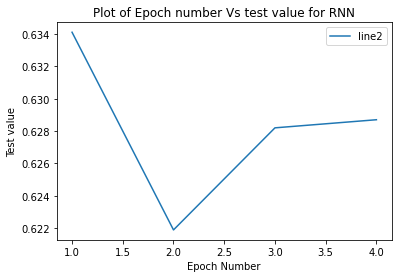

In [ ]:
#plt.plot(eps_list, RNN_accuracy_results, label="line1")
plt.plot(list(range(len(f1_rnn))), f1_rnn, label="line2")
plt.title('Plot of Epoch number Vs test value for RNN')
plt.xlabel('Epoch Number')
plt.ylabel('Test value')
plt.legend()
plt.show()

In [ ]:
model_RNN.fit(X_train_RNN, Y_train_RNN, epochs = 2, batch_size=batch_size, verbose = 2)

Epoch 1/2
223/223 - 96s - loss: 0.0050 - accuracy: 0.9985 - 96s/epoch - 430ms/step
Epoch 2/2
223/223 - 92s - loss: 0.0091 - accuracy: 0.9965 - 92s/epoch - 411ms/step


In [ ]:
model_RNN.evaluate(X_test_RNN, Y_test_RNN)

74/74 [==============================] - 7s 99ms/step - loss: 1.1320 - accuracy: 0.8637


[1.132049322128296, 0.8636752367019653]

In [ ]:
y_pred_RNN = ((model_RNN.predict(X_test_RNN).ravel()) > 0.5) 
Y_test_RNN_convert=(Y_test_RNN>0.5).ravel()

In [ ]:
CR_RNN=classification_report(Y_test_RNN_convert, y_pred_RNN)
print(CR_RNN)

              precision    recall  f1-score   support

       False       0.87      0.87      0.87      2340
        True       0.87      0.87      0.87      2340

    accuracy                           0.87      4680
   macro avg       0.87      0.87      0.87      4680
weighted avg       0.87      0.87      0.87      4680



In [ ]:
PCL_correct, not_PCL_correct, PCL_cnt, not_PCL_cnt = 0, 0, 0, 0
for x in range(len(X_validate_RNN)):
    
    result = model_RNN.predict(X_validate_RNN[x].reshape(1,X_test_RNN.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate_RNN[x]):
        if np.argmax(Y_validate_RNN[x]) == 0:
            not_PCL_correct += 1
        else:
            PCL_correct += 1
       
    if np.argmax(Y_validate_RNN[x]) == 0:
        not_PCL_cnt += 1
    else:
        PCL_cnt += 1


PCL_RNN_acc=PCL_correct/PCL_cnt*100
not_PCL_RNN_acc=not_PCL_correct/not_PCL_cnt*100


In [ ]:
print("PCL_correct_acc", PCL_RNN_acc, "%")
print("not_PCL_correct_acc", not_PCL_RNN_acc, "%")

PCL_correct_acc 0.0 %
not_PCL_correct_acc 100.0 %


# Compare results

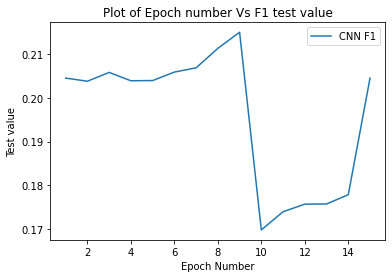

In [ ]:
plt.plot(list(range(1,16)), CNN_f1_results_total, label = "CNN F1")
plt.title('Plot of Epoch number Vs F1 test value')
plt.xlabel('Epoch Number')
plt.ylabel('Test value')
plt.legend()
plt.show()

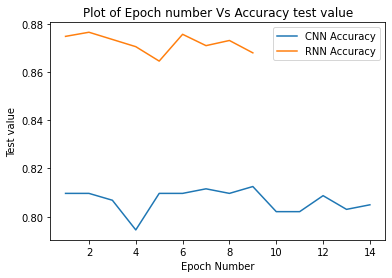

In [ ]:
plt.plot(NB_EPOCHS_CNN, CNN_acc_results, label = "CNN Accuracy")
#plt.plot(list(range(1,16)), CNN_f1_results_total, label = "CNN F1")
plt.plot(list(range(1,10)), RNN_acc_total, label="RNN Accuracy")
#plt.plot(eps_list, RNN_f1_results, label="RNN F1")

plt.title('Plot of Epoch number Vs Accuracy test value')
plt.xlabel('Epoch Number')
plt.ylabel('Test value')
plt.legend()
plt.show()

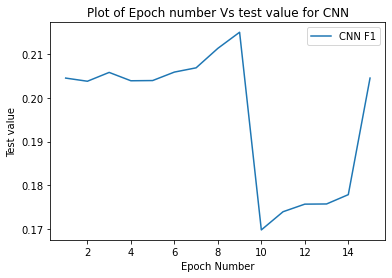

In [ ]:
#plt.plot(NB_EPOCHS_CNN, CNN_acc_results, label = "CNN Accuracy")
plt.plot(list(range(1,16)), CNN_f1_results_total, label = "CNN F1")
#plt.plot(eps_list, RNN_accuracy_results, label="RNN Accuracy")
#plt.plot(eps_list, RNN_f1_results, label="RNN F1")
plt.title('Plot of Epoch number Vs test value for CNN')
plt.xlabel('Epoch Number')
plt.ylabel('Test value')
plt.legend()
plt.show()

In [ ]:
Metrics_list.append("RNN")
Metrics_list.append("Bert")

In [ ]:
F1_score[1]

0.35489220563847423

In [ ]:
Metrics_score.append(Acc_RNN_final_res)
Metrics_score.append(0.9046)

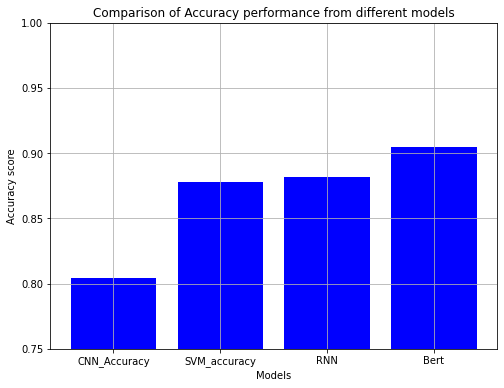

In [ ]:
plt.figure(figsize = (8, 6))
plt.bar(Metrics_list,Metrics_score, align = 'center', color = 'blue')
plt.title('Comparison of Accuracy performance from different models')
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.ylim(0.75, 1.0)
plt.grid()
#plt.savefig('Model_compare.jpeg')
plt.show()

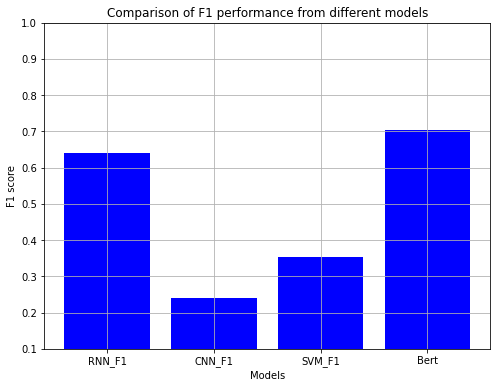

In [ ]:
plt.figure(figsize = (8, 6))
plt.bar(f1_list,f1, align = 'center', color = 'blue')
plt.title('Comparison of F1 performance from different models')
plt.xlabel('Models')
plt.ylabel('F1 score')
plt.ylim(0.1, 1.0)
plt.grid()
#plt.savefig('Model_compare.jpeg')
plt.show()